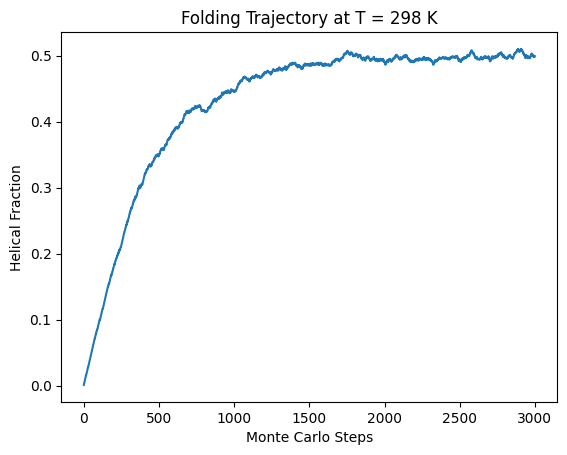

Mean Helical Fraction at T = 298 Helical Fraction: 0.4995


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Number of amino acids
T = 298  # Temperature in Kelvin
k_B = 1.380649e-23  # Boltzmann constant in J/K
epsilon = -k_B * T  # Energy difference for HC pairs in J
steps = 3000  # Number of Monte Carlo steps per simulation
repeats = 100  # Number of simulations

def energy_change(protein, i):
    """Calculate the energy change for flipping the i-th amino acid."""
    left_neighbor = protein[i - 1] if i > 0 else protein[-1]
    right_neighbor = protein[i + 1] if i < N - 1 else protein[0]
    
    # Change in energy due to interaction with neighbors
    delta_E = 0
    if protein[i] == 'C':
        if left_neighbor == 'C':
            delta_E += epsilon
        if right_neighbor == 'C':
            delta_E += epsilon
        if left_neighbor == 'H':
            delta_E -= epsilon
        if right_neighbor == 'H':
            delta_E -= epsilon
    else:  # if current state is 'H'
        if left_neighbor == 'C':
            delta_E -= epsilon
        if right_neighbor == 'C':
            delta_E -= epsilon
        if left_neighbor == 'H':
            delta_E += epsilon
        if right_neighbor == 'H':
            delta_E += epsilon
    return delta_E

def metropolis_step(protein, T):
    """Perform one Monte Carlo step using the Metropolis algorithm."""
    i = np.random.randint(0, N)  # Randomly select an amino ,select a number randomly from 0 to N-1
    
    delta_E = energy_change(protein, i)  # Calculate energy change
    
    # Metropolis acceptance criterion
    if delta_E < 0 or np.random.rand() < np.exp(-delta_E / (k_B * T)):
        #generate a uniform distributed value from 0 to 1
        # Flip the state: 'C' -> 'H' or 'H' -> 'C'
        protein[i] = 'H' if protein[i] == 'C' else 'C'

def simulate_protein(T, steps):
    """Simulate protein folding over a number of steps."""
    protein = ['C'] * N  # Initialize the protein in all 'C' (unfolded)
    helical_fraction = []  # Track the fraction of 'H' states
    
    for step in range(steps):
        metropolis_step(protein, T)
        helical_fraction.append(protein.count('H') / N)  # Calculate helical fraction
    
    return helical_fraction

def run_simulation(T, steps, repeats):
    """Run multiple simulations and average the helical fraction at steady state."""
    steady_state_fractions = []
    
    for _ in range(repeats):
        helical_fraction = simulate_protein(T, steps)
        steady_state_fractions.append(np.mean(helical_fraction[-100:]))  # Average over last 100 steps
        # We take the last 1000 helical fractions to be the steady state
        # Calculate the average of the average (steady state)
    
    return np.mean(steady_state_fractions)

# Simulate and plot a folding trajectory at T = 298 K
helical_fraction = simulate_protein(T, steps)

# Plot a representative folding trajectory
plt.plot(range(steps), helical_fraction)
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Helical Fraction')
plt.title('Folding Trajectory at T = 298 K')
plt.show()

# Repeat the simulation 100 times to calculate the mean helical fraction
mean_helical_fraction = run_simulation(T, steps, repeats)
print(f"Mean Helical Fraction at T = {T} Helical Fraction: {mean_helical_fraction:.4f}")


Text(0.5, 1.0, 'Transition Curve')

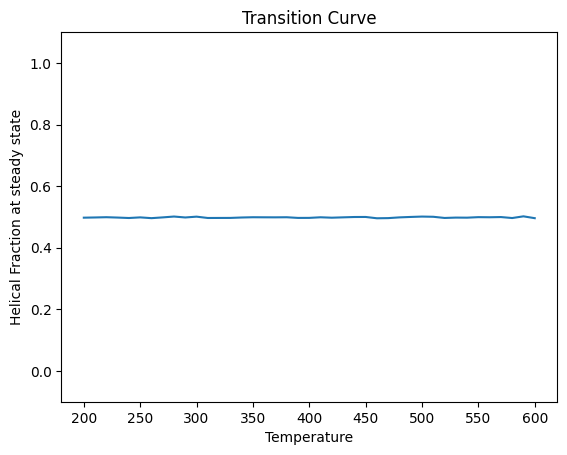

In [48]:
# Parameters
Temperature = np.array(range(200,610,10))
N = 1000  # Number of amino acids
T = 298  # Temperature in Kelvin
k_B = 1.380649e-23  # Boltzmann constant in J/K
epsilon = -k_B   # Energy difference for HC pairs in J
steps = 3000  # Number of Monte Carlo steps per simulation
repeats = 100  # Number of simulations


res = []
for T in Temperature:
    temp = run_simulation(T,steps,repeats)
    res.append(temp)
plt.plot(Temperature,res)
plt.xlabel('Temperature')
plt.ylabel('Helical Fraction at steady state')
plt.ylim((-0.1,1.1))
plt.title('Transition Curve')